Анализируем "Census Income" dataset: https://archive.ics.uci.edu/ml/datasets/Adult

In [1]:
import pandas as pd
import numpy as np

In [2]:
names = ['age','workclass','fnlwgt','education','education_num','marital_status',
        'occupation','relationship','race','sex','capital_gain','capital_loss',
        'hours_per_week','native_country','target']
data = pd.read_csv('adult.data', header=None, names=names)

In [3]:
data['bin_target'] = [1 if x == ' >50K' else 0 for x in data['target']]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
target            32561 non-null object
bin_target        32561 non-null int64
dtypes: int64(7), object(9)
memory usage: 4.0+ MB


In [5]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,target,bin_target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


### 1. Сколько мужчин и женщин представлено в наборе?

In [6]:
data['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

### 2. Средний возраст женщин

In [7]:
data[data['sex'] == ' Female']['age'].mean()

36.85823043357163

### 3. Доля граждан Германии

In [8]:
data['native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [9]:
data[data['native_country'] == ' Germany'].shape[0]/data.shape[0]

0.004207487485028101

### 4. Гистограмма распределения  образования

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

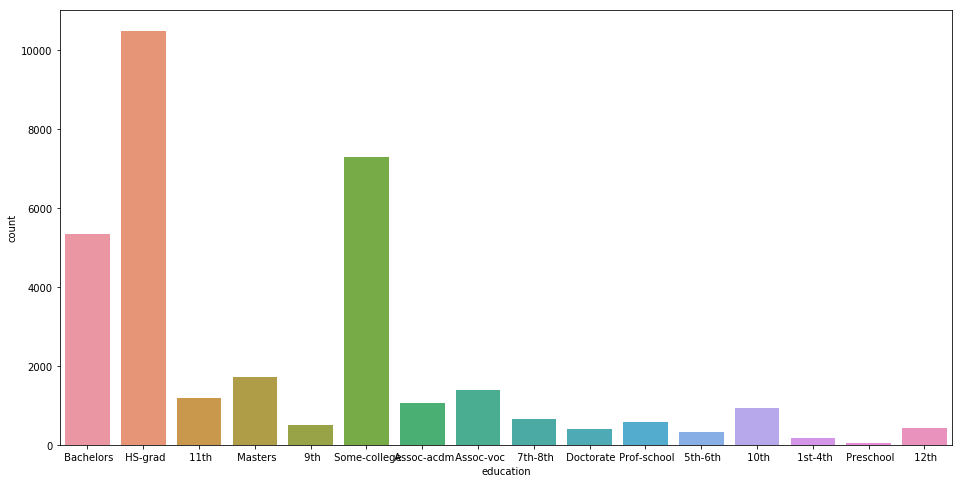

In [11]:
fig, ax = plt.subplots(figsize=(16,8))
sns.countplot(data['education'], ax=ax);

### 5. Классификатор

In [12]:
data['bin_target'].value_counts()

0    24720
1     7841
Name: bin_target, dtype: int64

In [13]:
test_data = pd.read_csv('adult.test',header=None, names=names, skiprows=1)

In [14]:
test_data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,target
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [15]:
test_data['target'].unique()

array([' <=50K.', ' >50K.'], dtype=object)

In [16]:
#сделаем бинарную колонку целевой переменной
test_data['bin_target'] = [1 if x == ' >50K.' else 0 for x in test_data['target']]

In [17]:
#текстовые колонки преобразуем в числовые, чтобы посмотреть корреляцию с таргетом
data.loc[:, data.dtypes == object].columns

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'target'],
      dtype='object')

In [18]:
from sklearn.preprocessing  import LabelEncoder

In [19]:
workclass_le = LabelEncoder().fit(data['workclass'])

In [20]:
#склеим два датасета, чтобы в обоих числовые метки были одинаковы
full_dataset = data.append(test_data)

In [21]:
#преобразуем текстовые колонки в числовые
cat_columns = full_dataset.loc[:, full_dataset.dtypes == object].drop('target', axis=1).columns
cat_columns

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country'],
      dtype='object')

In [22]:
full_dataset[cat_columns] = full_dataset[cat_columns].apply(LabelEncoder().fit_transform)

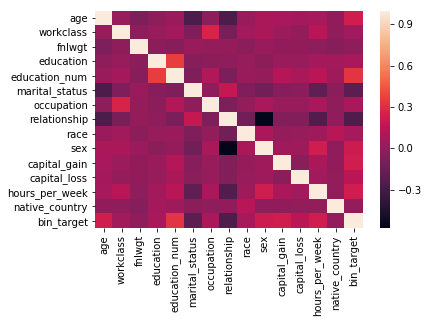

In [23]:
#корреляция
sns.heatmap(full_dataset.corr());

In [24]:
full_dataset.drop(['target','bin_target'], axis=1).corrwith(full_dataset['bin_target'])

age               0.230369
workclass         0.052674
fnlwgt           -0.006339
education         0.080091
education_num     0.332613
marital_status   -0.199072
occupation        0.076722
relationship     -0.253214
race              0.070934
sex               0.214628
capital_gain      0.223013
capital_loss      0.147554
hours_per_week    0.227687
native_country    0.012210
dtype: float64

In [25]:
#отберем самые значимые признаки и построим на них классификатор
meaningfull_features = ['age', 'education_num', 'marital_status', 'relationship',
                        'sex', 'capital_gain', 'capital_loss','hours_per_week']

In [26]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [27]:
X_train, X_test, y_train, y_test = train_test_split(data[meaningfull_features], data['bin_target'], test_size=0.2)
cat_features = [2,3,4]

In [28]:
train_pool = Pool(X_train, label=y_train, cat_features=cat_features)
eval_pool = Pool(X_test, label=y_test, cat_features=cat_features)
test_pool = Pool(X_test, label=y_test, cat_features=cat_features)

In [29]:
%%time
model = CatBoostClassifier(iterations=2000, use_best_model=True, loss_function='Logloss', eval_metric='Accuracy')
model.fit(train_pool, eval_set=eval_pool, logging_level = 'Silent')

Wall time: 1min 32s


In [30]:
#результат классификации
predictions = model.predict(test_data[meaningfull_features])
print('Accuracy: ', accuracy_score(test_data['bin_target'], predictions))

Accuracy:  0.866654382408943


In [31]:
fi = dict()

In [34]:
for i, name in enumerate(X_train.columns):
    fi[name] = model.feature_importances_[i]

In [35]:
fi

{'age': 16.04095058904412,
 'capital_gain': 25.763300911147844,
 'capital_loss': 10.079457701703976,
 'education_num': 11.458116863878702,
 'hours_per_week': 9.190083331240286,
 'marital_status': 3.413148924376299,
 'relationship': 22.221771580309078,
 'sex': 1.8331700982996986}